<a href="https://colab.research.google.com/github/Soliloquiess/ALGORITHM/blob/main/%EC%B9%9C%EC%B9%A0%EB%9D%BC%EC%BD%94%EC%B9%98_04%EC%A1%B0_4%EC%A3%BC%EC%B0%A8_%EB%AF%B8%EC%85%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터셋 출처
* [E-Commerce Shipping Data | Kaggle](https://www.kaggle.com/datasets/prachi13/customer-analytics)

### 데이터 구성

* ID : 고객 ID
* Warehouse_block : 창고의 유형 (A, B, C, D, F)
* Mode_of_Shipment : 운송 방법 (ship, flight, road)
* Customer_care_calls : 배송조회를 위해 고객이 문의한 전화 건수
* Customer_rating: 고객이 평가한 회사의 평점 (1;worst ~ 5;best)
* Cost_of_the_product: 제품의 가격 (US 달러)
* Prior_purchases: 이전에 구매한 횟수
* Product_importance: 회사가 매긴 제품의 중요도 (low, medium, high)
* Gender: 성별 (남, 녀)
* Discount_offered: 특정 제품에 대해 할인된 비율
* Weight_in_gms: 제품의 무게 (g)
* Reached_on_time : (target variable) 1은 제품이 제시간에 도착하지 못함, 0은 제품이 제시간에 도착함



In [ ]:
### insperation
# 1) Customer rating이란? 제품이 정시에 배송되었는가?
# 2) 고객 문의에 대한 답변이 이루어졌는가?
# 3) 제품의 중요도가 높은 경우, 평점이 높거나 제시간에 배송되었는가?

### 1. 필요한 라이브러리 로드

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# userwarning 메시지 끄기 (다시 켜려면 default로)
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2. 데이터셋 로드

In [ ]:
PATH = "/content/drive/MyDrive/Colab Notebooks/Dataset/DataScienceProject2024/"

In [ ]:
df = pd.read_csv(PATH + "Train.csv")
df.head()

# Warehouse_block, Mode_of_Shipment, Product_importance, Gender, Customer_rating: 범주형 변수

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
# 데이터의 크기
df.shape

(10999, 12)

In [ ]:
# 데이터 유형 및 개수
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
# 수치데이터에 대한 요약 -> 결측치는 없는 것으로 보인다.
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


### 3. EDA

#### 범주형 변수의 EDA

In [ ]:
print("####count####")
print(df["Reached.on.Time_Y.N"].value_counts())
print("\n")
print("####ratio####")
print(df["Reached.on.Time_Y.N"].value_counts(normalize=True))

####count####
1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64


####ratio####
1    0.596691
0    0.403309
Name: Reached.on.Time_Y.N, dtype: float64


<Axes: xlabel='Reached.on.Time_Y.N', ylabel='count'>

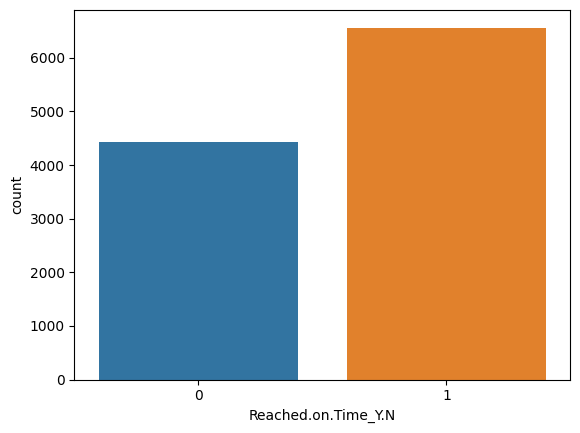

In [ ]:
# label 균형이 잘 맞는지 살펴보기 -> 균형은 적절한 듯
sns.countplot(data=df, x="Reached.on.Time_Y.N", palette="tab10")

# 제시간에 배송받지 못한 case가 더 많다.

In [ ]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

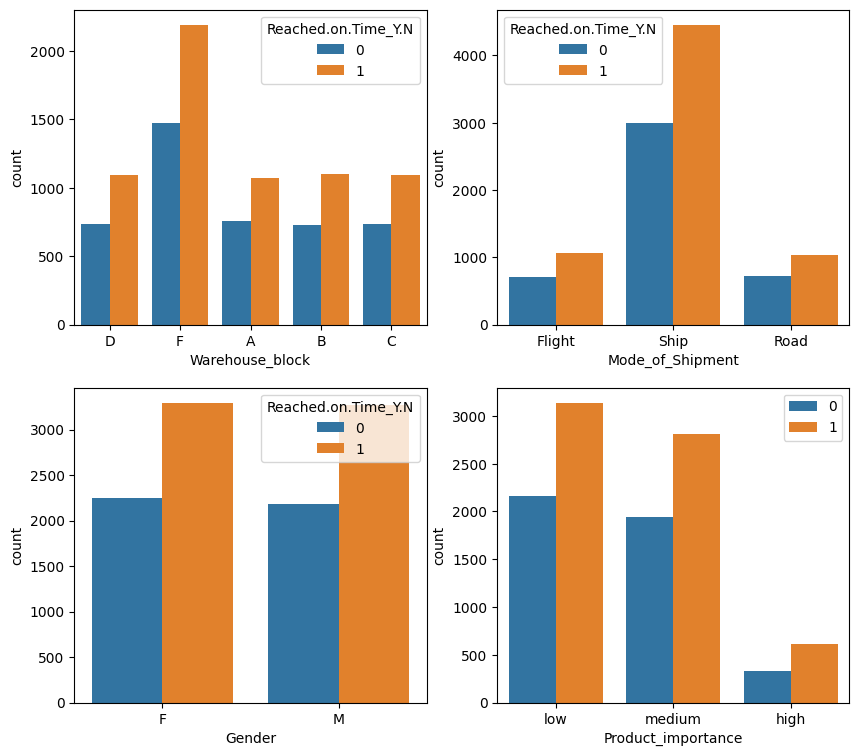

In [ ]:
category_col = df.columns[[1, 2, -4, -5]] # warehouse_block, mode_of_shipment, gender, product_importance

category_col_name = category_col.tolist()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 9))

for i, col_name in enumerate(category_col_name):
  row = i // 2
  col = i % 2
  sns.countplot(data=df, x=col_name, hue="Reached.on.Time_Y.N", ax = axes[row][col], palette="tab10")

plt.legend()
plt.show()

In [ ]:
'''
### 해석 ###
1. Warehouse_block
1) A, B, C, D 모두 비슷한 제시간배송 및 늦은배송 비율을 가지고 있다.
2) 하지만 F의 경우 다른 창고들보다 배송 횟수가 더 많고, 그만큼 늦은 배송도 많다.
3) F의 경우엔 다른 블록들보다 제시간배송 대비 늦은배송 비율이 더 크게 차이 난다.
4) 모두 제시간배송보다 늦은배송 횟수가 더 많다.

2. Mode_of_Shipment
1) Flight와 Road는 비슷한 제시간배송 및 늦은배송 비율을 가지고 있다.
2) 하지만 Ship은 다른 운송수단보다 배송 횟수가 매우 많다.
3) Ship의 제시간배송 횟수는 다른 운송수단의 약 3배 정도이고,
4) Ship의 늦은배송 횟수는 다른 운송수단의 약 4배 정도이다.
5) 모두 제시간배송보다 늦은배송 횟수가 더 많다.

3. Gender
1) 성별에 따른 배송 비율 차이는 없는 것으로 보인다.
2) 모두 제시간배송보다 늦은배송 횟수가 더 많다.

4. Product_importance
1) low와 medium의 배송 비율 차이는 비슷해 보이지만,
2) medium의 배송 횟수가 low보다 근소하게 적다.
3) high의 배송 횟수는 low와 medium에 비해 매우 적다.
4) 그러나 high로 지정되었음에도, 늦은배송의 비율이 더 많다.
5) 심지어 high의 제시간배송 대비 늦은배송 비율은 low나 medium보다 높다. (제시간배송의 약 2배)
6) 모두 제시간배송보다 늦은배송 횟수가 더 많다.

공통점
- 대부분 제시간배송 대비 늦은배송이 약 0.5배 정도 더 많은 비율을 보이는 것이 특이하다.
'''

'\n### 해석 ###\n1. Warehouse_block\n1) A, B, C, D 모두 비슷한 제시간배송 및 늦은배송 비율을 가지고 있다.\n2) 하지만 F의 경우 다른 창고들보다 배송 횟수가 더 많고, 그만큼 늦은 배송도 많다.\n3) F의 경우엔 다른 블록들보다 제시간배송 대비 늦은배송 비율이 더 크게 차이 난다.\n4) 모두 제시간배송보다 늦은배송 횟수가 더 많다.\n\n2. Mode_of_Shipment\n1) Flight와 Road는 비슷한 제시간배송 및 늦은배송 비율을 가지고 있다.\n2) 하지만 Ship은 다른 운송수단보다 배송 횟수가 매우 많다.\n3) Ship의 제시간배송 횟수는 다른 운송수단의 약 3배 정도이고,\n4) Ship의 늦은배송 횟수는 다른 운송수단의 약 4배 정도이다.\n5) 모두 제시간배송보다 늦은배송 횟수가 더 많다.\n\n3. Gender\n1) 성별에 따른 배송 비율 차이는 없는 것으로 보인다.\n2) 모두 제시간배송보다 늦은배송 횟수가 더 많다.\n\n4. Product_importance\n1) low와 medium의 배송 비율 차이는 비슷해 보이지만,\n2) medium의 배송 횟수가 low보다 근소하게 적다.\n3) high의 배송 횟수는 low와 medium에 비해 매우 적다.\n4) 그러나 high로 지정되었음에도, 늦은배송의 비율이 더 많다.\n5) 심지어 high의 제시간배송 대비 늦은배송 비율은 low나 medium보다 높다. (제시간배송의 약 2배)\n6) 모두 제시간배송보다 늦은배송 횟수가 더 많다.\n\n공통점\n- 대부분 제시간배송 대비 늦은배송이 약 0.5배 정도 더 많은 비율을 보이는 것이 특이하다.\n'

In [ ]:
# 창고 유형별 count
df["Warehouse_block"].value_counts() # F 창고 유형의 수가 다른 창고 유형들의 약 2배이다.

# F 창고 유형의 수가 절대적으로 많기 때문에, 배송 횟수에서 차이가 난 것으로 보임.

F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64

In [ ]:
# 운송수단 유형별 count
df["Mode_of_Shipment"].value_counts() # Ship으로 운송하는 수가 다른 운송수단의 약 4배이다.

# Ship으로 운반하는 수가 절대적으로 많기 때문에, 배송 횟수에서 차이가 난 것으로 보임.

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

<Axes: xlabel='Customer_rating', ylabel='count'>

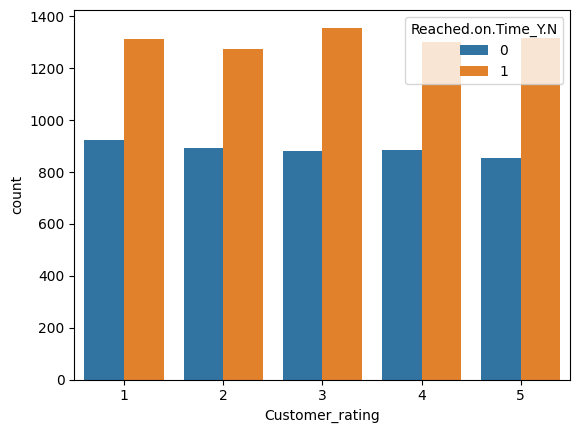

In [ ]:
# 고객의 평점에 따른 제시간배송여부 countplot
# 예상: 고객의 평점이 높을수록 늦은배송의 비율이 줄어들 것이다.
sns.countplot(data=df, x="Customer_rating", hue="Reached.on.Time_Y.N")

# -> 결과: 고객의 평점에 따른 제시간배송 및 늦은배송 비율의 유의미한 차이는 없었다.
# 공통적으로 모두 늦은배송의 비율이 더 높았다.

#### 수치형 변수의 EDA

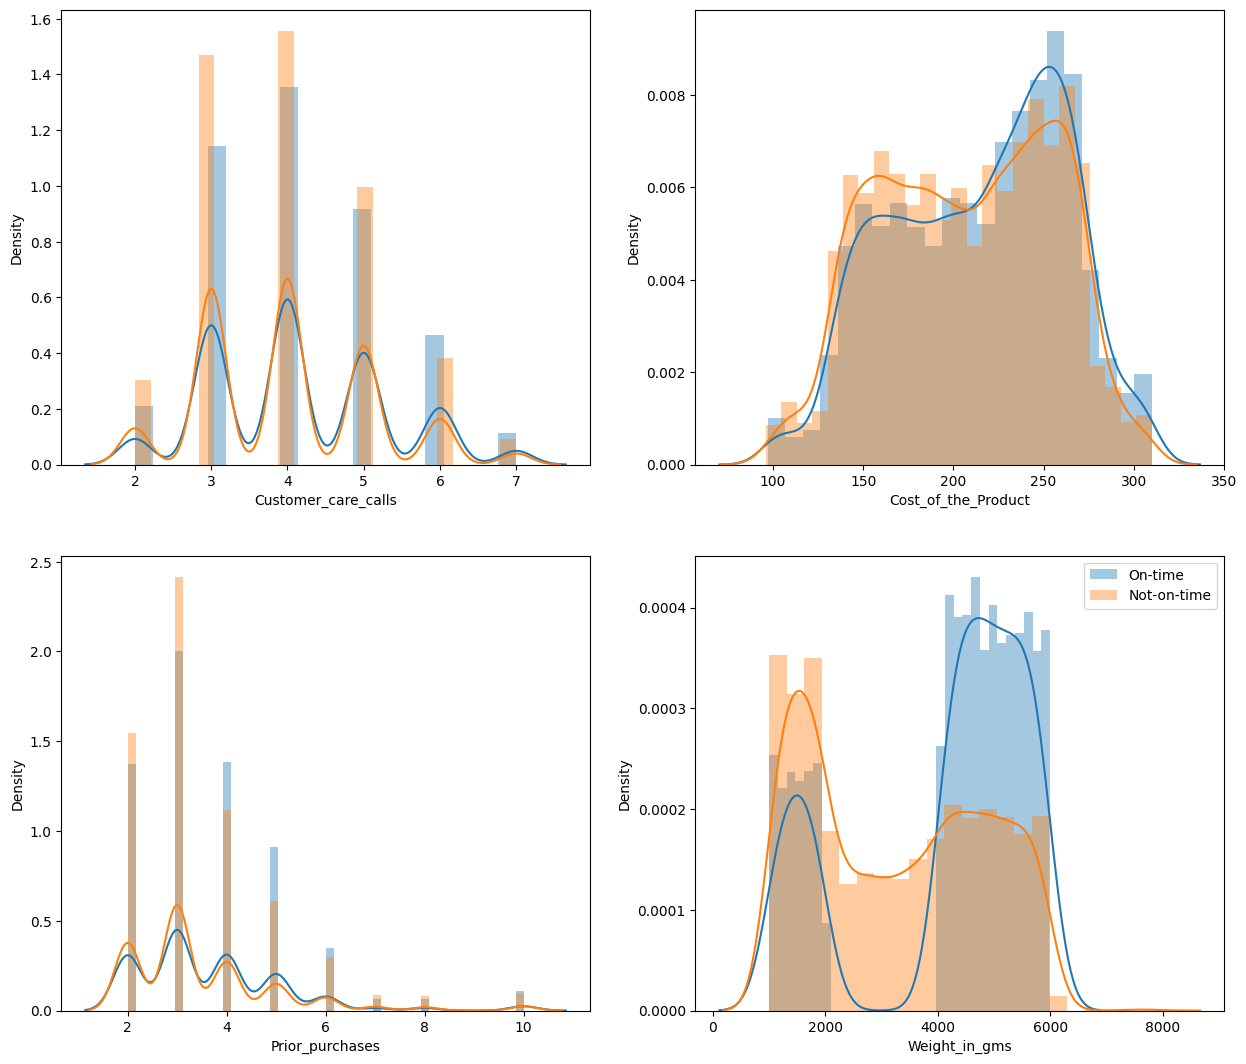

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 13))

num_col = df.columns[[3, 5, 6, -2]] # customer_care_calls, cost_of_the_product, prior_purchases, weight_in_gms
num_col_name = num_col.tolist()

df_Yes = df[df["Reached.on.Time_Y.N"]==0]
df_No = df[df["Reached.on.Time_Y.N"]==1]

for i, col_name in enumerate(num_col_name):
  row = i // 2
  col = i % 2
  sns.distplot(df_Yes[col_name], ax=axes[row][col], label="On-time")
  sns.distplot(df_No[col_name], ax=axes[row][col], label="Not-on-time")

plt.legend()
plt.show()

In [ ]:
df["Customer_care_calls"].value_counts().sort_index() # 고객의 문의 횟수별 count

2     638
3    3217
4    3557
5    2328
6    1013
7     246
Name: Customer_care_calls, dtype: int64

In [ ]:
'''
### 해석 ###
1. Customer_care_calls
1) 고객의 문의 횟수가 적을 땐 늦은배송의 비율이 높으나,
2) 고객의 문의 횟수가 6번 이상이면 늦은배송의 비율이 제시간배송의 비율보다 줄어들거나 비슷해진다.
3) 고객의 문의 횟수는 3~5번이 빈도 수가 가장 높다.
# 의문점: 왜 문의 횟수가 많아질 때 오히려 제시간배송의 비율이 갑자기 높아진 걸까?

2. Cost_of_the_Product
1) 제품의 가격이 210을 기점으로, 210 달러 전에는 늦은배송의 비율이 높고,
2) 210달러를 넘어서면 제시간배송의 비율이 늦은배송의 비율보다 근소하게 더 높아진다.
# 의문점: 회사가 매긴 중요도에 의한 유의미한 배송비율 차이는 없었는데,
# 왜 가격이 높아지면 제시간배송의 비율이 조금이지만 높아질까?

3. Prior_Purchase
1) 이전 구매 횟수가 3번 이하일 땐 늦은배송의 비율이 더 높지만,
2) 이전 구매 횟수가 3번을 초과하면 6번까지는 제시간배송의 비율이 더 높아지는 경향을 보인다.
3) 그리고 다시 6번을 초과하면 늦은배송의 비율이 더 높아지거나 제시간배송의 비율과 비슷해진다.
3) 이전 구매 횟수가 7번 이상인 경우는 데이터 수가 적다. (이전 구매 횟수가 7번 이상인 case는 많지 않다.)
# 왜 이전 구매 횟수가 적으면 늦은배송의 비율이 더 높을까?
# 단골 손님에게 특혜? 이전에 구매한 적 있어서 배송할 때 주소를 헷갈리지 않아서?

4. Weight_in_gms
1) 4000g까지는 늦은배송 비율이 유의미하게 더 높다.
2) 4000g부터 6000g까지는 제시간배송 비율이 유의미하게 더 높다.
3) *** 2000g부터 4000g까지는 제시간에 배송된 건수가 없다.
4) 6000g 이상인 경우는 데이터 수가 적다.
=> 분류에 영향을 많이 주는 변수일 것으로 예상된다.
'''

'\n### 해석 ###\n1. Customer_care_calls\n1) 고객의 문의 횟수가 적을 땐 늦은배송의 비율이 높으나,\n2) 고객의 문의 횟수가 6번 이상이면 늦은배송의 비율이 제시간배송의 비율보다 줄어들거나 비슷해진다.\n3) 고객의 문의 횟수는 3~5번이 빈도 수가 가장 높다.\n# 의문점: 왜 문의 횟수가 많아질 때 오히려 제시간배송의 비율이 갑자기 높아진 걸까?\n\n2. Cost_of_the_Product\n1) 제품의 가격이 210을 기점으로, 210 달러 전에는 늦은배송의 비율이 높고,\n2) 210달러를 넘어서면 제시간배송의 비율이 늦은배송의 비율보다 근소하게 더 높아진다.\n# 의문점: 회사가 매긴 중요도에 의한 유의미한 배송비율 차이는 없었는데,\n# 왜 가격이 높아지면 제시간배송의 비율이 조금이지만 높아질까?\n\n3. Prior_Purchase\n1) 이전 구매 횟수가 3번 이하일 땐 늦은배송의 비율이 더 높지만,\n2) 이전 구매 횟수가 3번을 초과하면 6번까지는 제시간배송의 비율이 더 높아지는 경향을 보인다.\n3) 그리고 다시 6번을 초과하면 늦은배송의 비율이 더 높아지거나 제시간배송의 비율과 비슷해진다.\n3) 이전 구매 횟수가 7번 이상인 경우는 데이터 수가 적다. (이전 구매 횟수가 7번 이상인 case는 많지 않다.)\n# 왜 이전 구매 횟수가 적으면 늦은배송의 비율이 더 높을까?\n# 단골 손님에게 특혜? 이전에 구매한 적 있어서 배송할 때 주소를 헷갈리지 않아서?\n\n4. Weight_in_gms\n1) 4000g까지는 늦은배송 비율이 유의미하게 더 높다.\n2) 4000g부터 6000g까지는 제시간배송 비율이 유의미하게 더 높다.\n3) *** 2000g부터 4000g까지는 제시간에 배송된 건수가 없다.\n4) 6000g 이상인 경우는 데이터 수가 적다.\n=> 분류에 영향을 많이 주는 변수일 것으로 예상된다.\n'

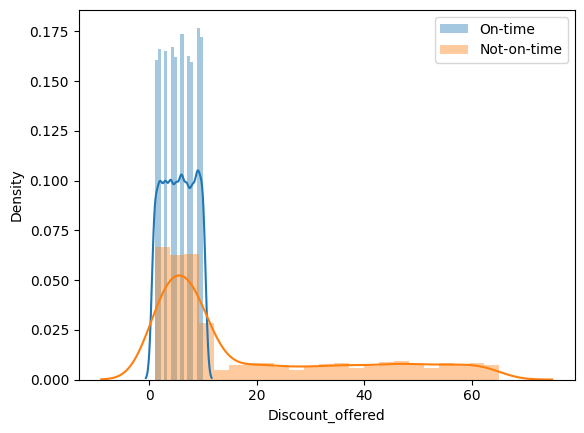

In [ ]:
sns.distplot(df_Yes["Discount_offered"], label="On-time")
sns.distplot(df_No["Discount_offered"], label="Not-on-time")
plt.legend()
plt.show()

In [ ]:
'''
5. Discount_offered
1) *** discount 비율이 0% ~ 10%일 때는 제시간배송 비율이 늦은배송 비율의 2배 이상 높다.
2) *** discount 비율이 10%를 초과하면 제시간에 배송된 건수가 없다.
=> 이 변수 역시 분류에 많은 영향을 주는 변수일 것으로 예상된다.
'''

'\n5. Discount_offered\n1) *** discount 비율이 0% ~ 10%일 때는 제시간배송 비율이 늦은배송 비율의 2배 이상 높다.\n2) *** discount 비율이 10%를 초과하면 제시간에 배송된 건수가 없다.\n=> 이 변수 역시 분류에 많은 영향을 주는 변수일 것으로 예상된다.\n'

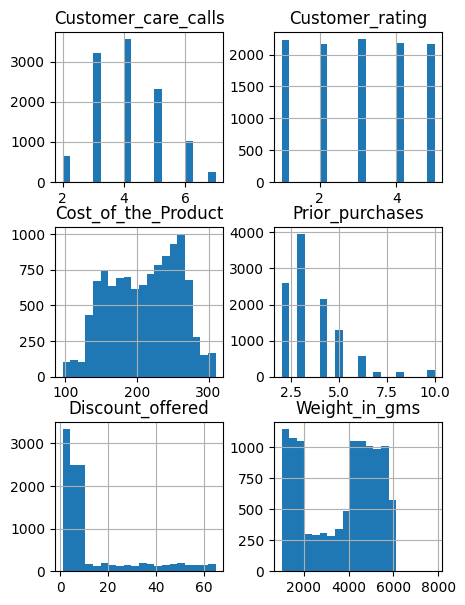

In [ ]:
h = df[["Customer_care_calls", "Customer_rating",
        "Cost_of_the_Product", "Prior_purchases",
        "Discount_offered", "Weight_in_gms"]].hist(figsize=(5, 7), bins=20)

In [ ]:
'''
### 해석 ###
1) 고객 평가의 빈도는 1~5까지 균등하다.
2) 제품의 가격이 너무 싸거나 비싼 경우는 빈도가 낮다.
3) 제품 할인은 10%까지가 빈도가 높고, 10%를 넘어서면 빈도가 매우 낮아진다.
4) 제품의 무게는 2000g에서 4000g은 다른 구간에 비해 상대적으로 매우 적다.
# 의문점: 왜 2000g에서 4000g의 무게를 가진 제품은 빈도가 적을까?
# 이 회사에서 파는 제품의 특성(전자제품) 때문?
'''

'\n### 해석 ###\n1) 고객 평가의 빈도는 1~5까지 균등하다.\n2) 제품의 가격이 너무 싸거나 비싼 경우는 빈도가 낮다.\n3) 제품 할인은 10%까지가 빈도가 높고, 10%를 넘어서면 빈도가 매우 낮아진다.\n4) 제품의 무게는 2000g에서 4000g은 다른 구간에 비해 상대적으로 매우 적다.\n# 의문점: 왜 2000g에서 4000g의 무게를 가진 제품은 빈도가 적을까?\n# 이 회사에서 파는 제품의 특성(전자제품) 때문?\n'

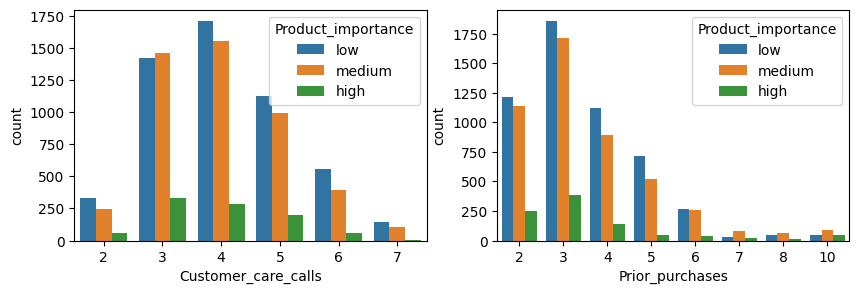

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

num_col = df.columns[[3, 6]] # customer_care_calls, prior_purchases
num_col_name = num_col.tolist()

for i, col_name in enumerate(num_col_name):
  col = i % 2
  sns.countplot(data=df, x=col_name, hue="Product_importance", ax=axes[col])

plt.show()

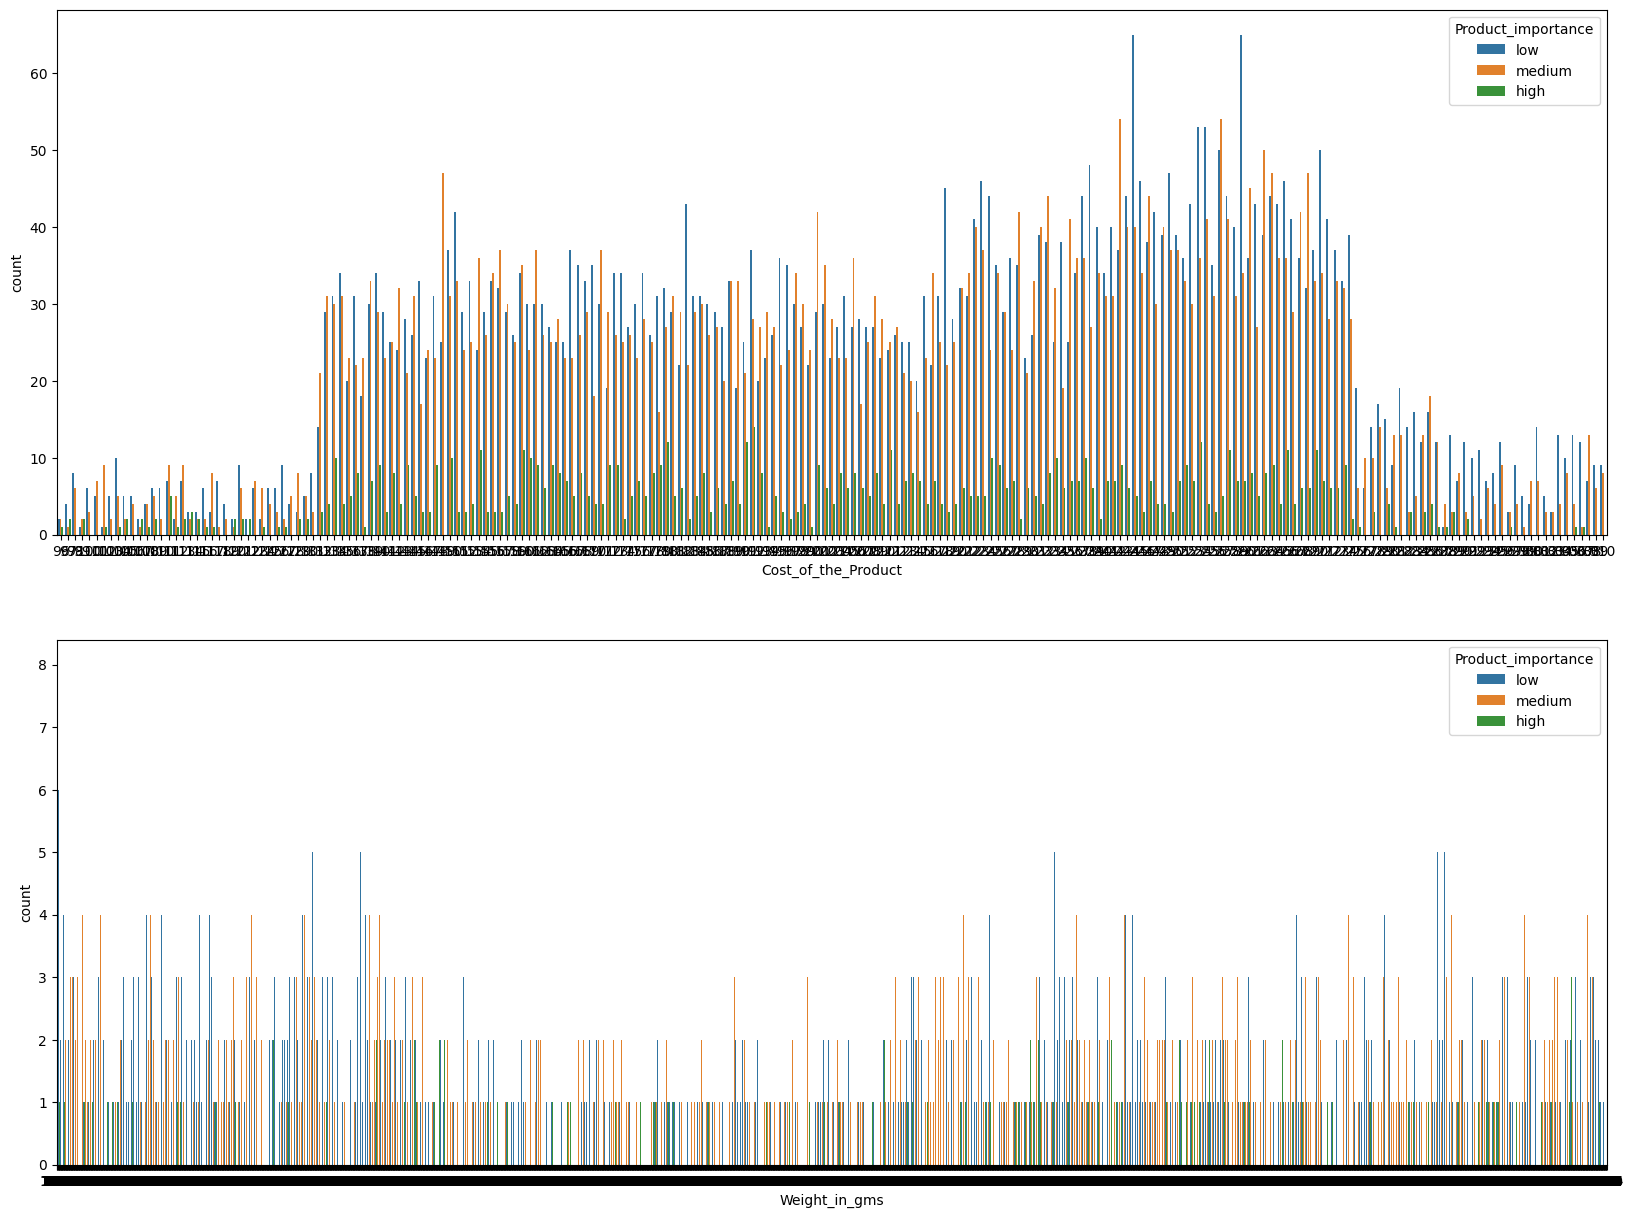

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))

sns.countplot(data=df, x="Cost_of_the_Product", hue="Product_importance", ax=axes[0])
sns.countplot(data=df, x="Weight_in_gms", hue="Product_importance", ax=axes[1])
plt.show()

<Axes: xlabel='Discount_offered', ylabel='count'>

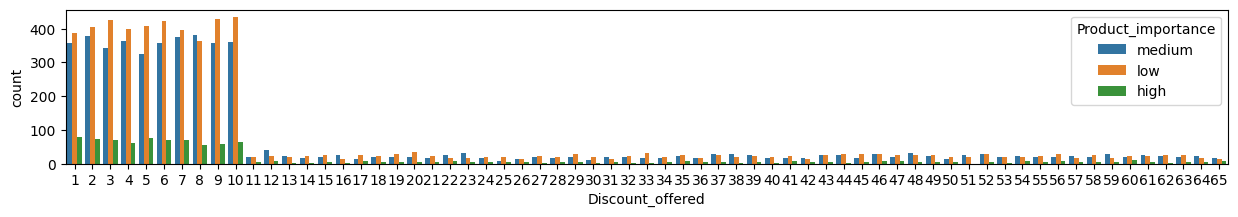

In [ ]:
plt.figure(figsize=(15, 2))
sns.countplot(data=df, x="Discount_offered", hue="Product_importance")

In [ ]:
'''
### 해석 ###
회사가 매긴 중요도는 제품의 가격, 제품의 무게, 가격 할인과는 연관이 없어 보인다.
제품 가격 그래프에서 중간값에서 중요도가 high인 것이 많아 보이는 이유는,
중간값의 빈도가 가장 높아서인 것으로 보인다.
즉, 제품 배송의 빈도가 많을수록, 중요도가 높은 제품도 비례하여 많아진다고 보여진다.
문의 횟수와 이전 구매 횟수 그래프도 마찬가지로, 대체로 제품 배송의 빈도에 비례하여
중요도가 높은 제품의 수도 많아진다.
=> 즉, 위의 변수들(제품 가격, 제품 무게, 가격 할인, 문의 횟수, 이전 구매 횟수)과
중요도는 큰 관련이 없어 보인다.

범위가 너무 넓어서 그래프로 정확한 파악을 할 수 없다. 나중에 스케일링한 후에
다시 시각화를 해야 할 것 같다.

'''

'\n### 해석 ###\n회사가 매긴 중요도는 제품의 가격, 제품의 무게, 가격 할인과는 연관이 없어 보인다.\n제품 가격 그래프에서 중간값에서 중요도가 high인 것이 많아 보이는 이유는,\n중간값의 빈도가 가장 높아서인 것으로 보인다.\n즉, 제품 배송의 빈도가 많을수록, 중요도가 높은 제품도 비례하여 많아진다고 보여진다.\n문의 횟수와 이전 구매 횟수 그래프도 마찬가지로, 대체로 제품 배송의 빈도에 비례하여\n중요도가 높은 제품의 수도 많아진다.\n=> 즉, 위의 변수들(제품 가격, 제품 무게, 가격 할인, 문의 횟수, 이전 구매 횟수)과\n중요도는 큰 관련이 없어 보인다.\n\n범위가 너무 넓어서 그래프로 정확한 파악을 할 수 없다. 나중에 스케일링한 후에\n다시 시각화를 해야 할 것 같다.\n\n'

#### 변수간 상관관계 분석

In [ ]:
dfc = df.copy()
dfc = dfc.drop(["ID"], axis=1)
dfc.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
df_corr = dfc.corr()
df_corr

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Customer_care_calls,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached.on.Time_Y.N,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


<Axes: >

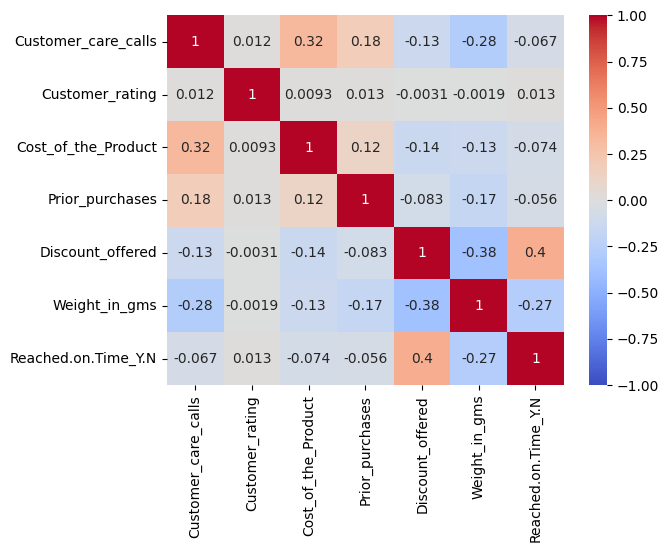

In [ ]:
sns.heatmap(df_corr, vmax=1, vmin=-1, annot=True, cmap="coolwarm")
# 변수간에 크게 유의미한 상관관계는 없는 것으로 나타난다.
# Discount_offered와 Weight_in_gms: 약한 음적 상관관계
# Customer_care_calls와 Cost_of_the_Product: 약한 양적 상관관계

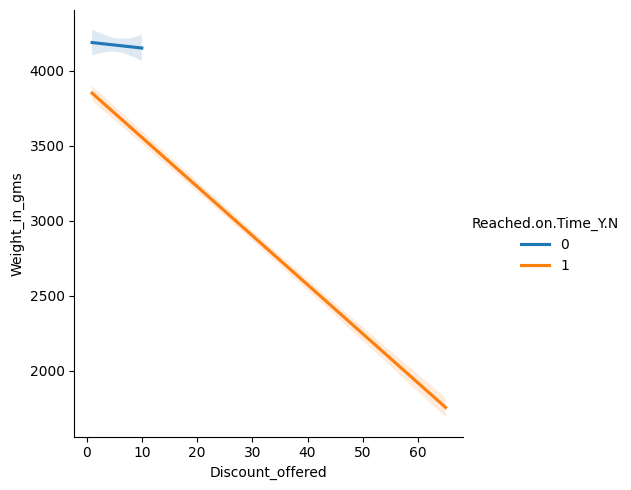

In [ ]:
# Discount_offered와 Weight_in_gms의 lmplot
sns.lmplot(data=df, x="Discount_offered", y="Weight_in_gms", hue="Reached.on.Time_Y.N", scatter=False)

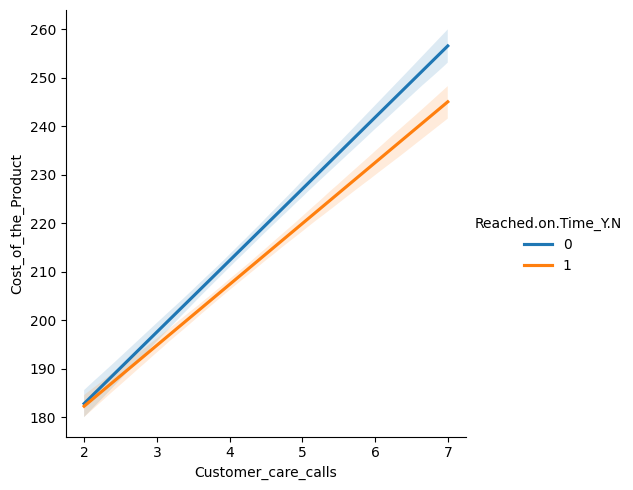

In [ ]:
# Customer_care_calls와 Cost_of_the_Product의 lmplot
sns.lmplot(data=df, x="Customer_care_calls", y="Cost_of_the_Product", hue="Reached.on.Time_Y.N", scatter=False)

### 4. 피처 엔지니어링

#### 이상치 찾기

In [ ]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

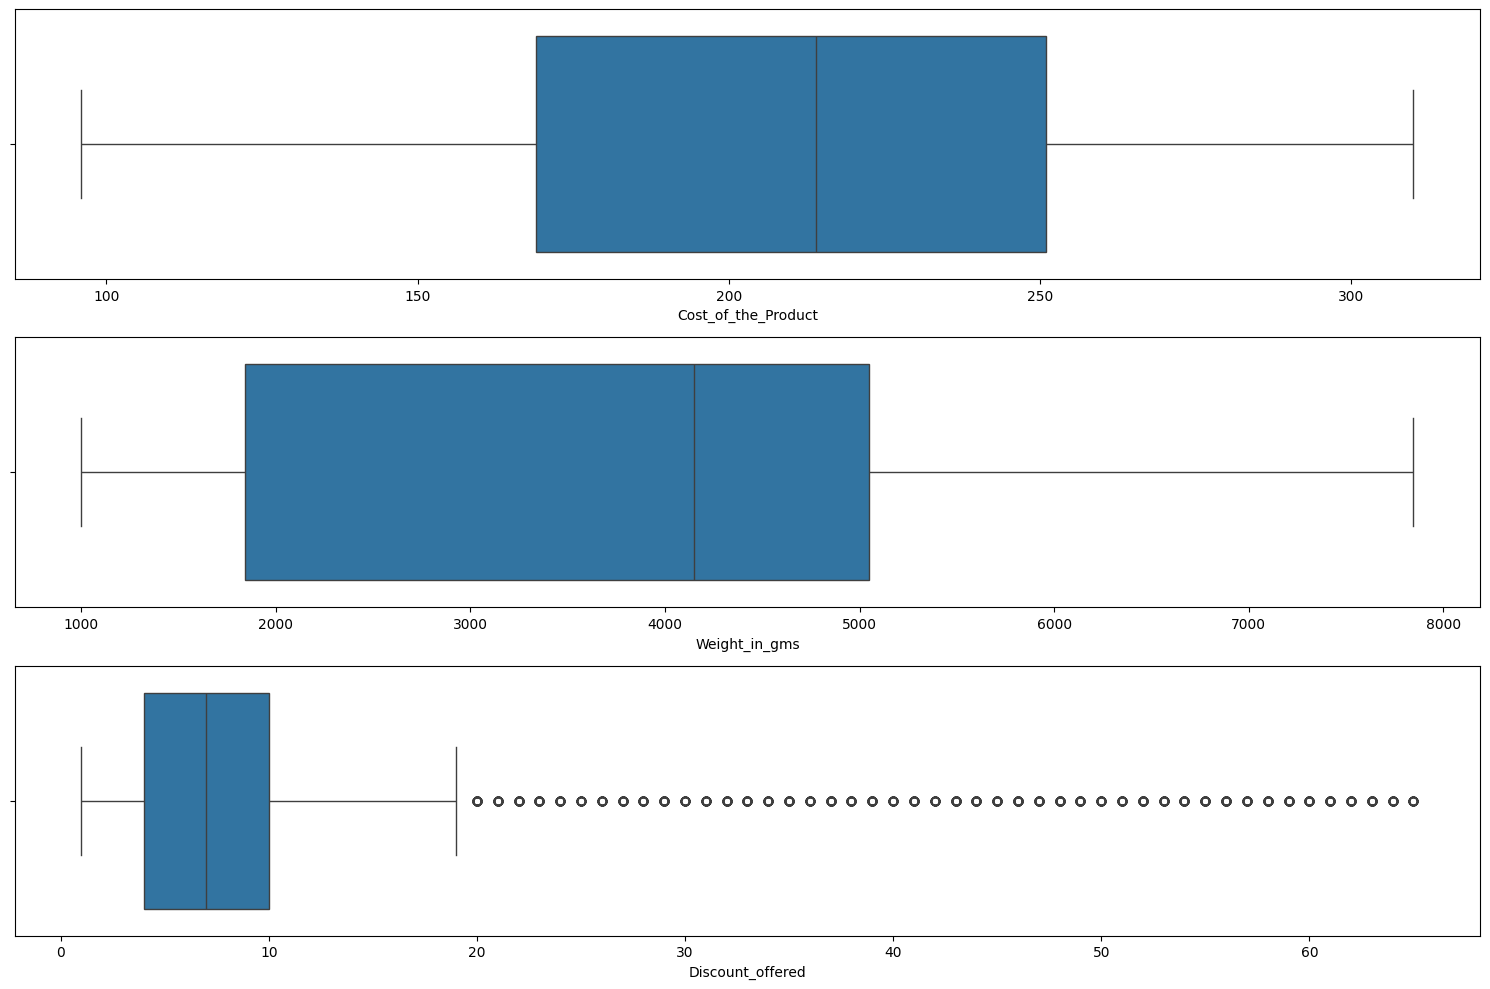

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

num_col = df.columns[[5, -2, -3]] # cost_of_the_product, discount_offered, weight_in_gms
num_col_name = num_col.tolist()

for i, col_name in enumerate(num_col_name):
  sns.boxplot(x=df[col_name], ax=axes[i])

plt.tight_layout()
plt.show()

In [ ]:
df["Discount_offered"].value_counts().sort_index(ascending=False)

65     36
64     43
63     53
62     49
61     53
     ... 
5     810
4     825
3     840
2     858
1     824
Name: Discount_offered, Length: 65, dtype: int64

In [ ]:
# Discount_offered의 IQR 구하기
IQR3 = df["Discount_offered"].quantile(0.75)
IQR1 = df["Discount_offered"].quantile(0.25)
IQR = IQR3 - IQR1
IQR

6.0

In [ ]:
OUT = IQR3 + (IQR * 1.5)
OUT # 이상치 기준

19.0

In [ ]:
df[df["Discount_offered"] > OUT].shape # 제거할 데이터가 너무 많다 -> 제거 대신 로그변환 하기로

(2209, 12)

#### 로그변환

In [ ]:
#sns.distplot(df["Discount_offered"])

In [ ]:
# Discount_offered(할인)를 로그변환
#df["Discount_log"] = np.log(df.loc[df["Discount_offered"], "Discount_offered"] + 1)

In [ ]:
#sns.distplot(df["Prior_purchases"])

In [ ]:
# Prior_purchases(이전 구매 횟수)를 로그변환
#df["P_purchase_log"] = np.log(df["Prior_purchases"] + 1)

#### 수치형 변수를 범주형 변수로 변환

In [ ]:
# Weight_in_gms를 시각화 결과대로 나누기
df["gms_ot_low"] = (df["Weight_in_gms"] < 4000) | (df["Weight_in_gms"] > 6000)
df["gms_ot_high"] = (df["Weight_in_gms"] >= 4000) & (df["Weight_in_gms"] <= 6000)
df[["Weight_in_gms", "gms_ot_low", "gms_ot_high"]].head()

,Weight_in_gms,gms_ot_low,gms_ot_high
0,1233,True,False
1,3088,True,False
2,3374,True,False
3,1177,True,False
4,2484,True,False


In [ ]:
# Discount_offered를 시각화 결과대로 나누기
df["Dc_ot_high"] = (df["Discount_offered"] <= 10)
df["Dc_ot_low"] = (df["Discount_offered"] > 10)
df[["Discount_offered", "Dc_ot_high", "Dc_ot_low"]].head()

,Discount_offered,Dc_ot_high,Dc_ot_low
0,44,False,True
1,59,False,True
2,48,False,True
3,10,True,False
4,46,False,True


In [ ]:
# Prior_purchases를 시각화 결과대로 나누기
df["P_pcs_ot_low"] = (df["Prior_purchases"] < 4) | (df["Prior_purchases"] > 5)
df["P_pcs_ot_high"] = (df["Prior_purchases"] >= 4) & (df["Prior_purchases"] <= 5)
df[["Prior_purchases", "P_pcs_ot_low", "P_pcs_ot_high"]].head()

,Prior_purchases,P_pcs_ot_low,P_pcs_ot_high
0,3,True,False
1,2,True,False
2,4,False,True
3,4,False,True
4,3,True,False


In [ ]:
# Cost_of_the_Product를 시각화 결과대로 나누기
df["cost_ot_low"] = (df["Cost_of_the_Product"] < 210)
df["cost_ot_high"] = (df["Cost_of_the_Product"] >= 210)
df[["Cost_of_the_Product", "cost_ot_low", "cost_ot_high"]].head()

,Cost_of_the_Product,cost_ot_low,cost_ot_high
0,177,True,False
1,216,False,True
2,183,True,False
3,176,True,False
4,184,True,False


#### 파생변수 만들기

In [ ]:
'''
# Mode_of_Shipment, Warehouse_block
df["Mode_of_Shipment"] = df["Mode_of_Shipment"].replace({"Ship":"Ship", "Flight":"Others", "Road":"Others"})
df["Warehouse_block"] = df["Warehouse_block"].replace({"F":"F", "A":"Others", "B": "Others", "C":"Others", "D":"Others"})
'''

'\n# Mode_of_Shipment, Warehouse_block\ndf["Mode_of_Shipment"] = df["Mode_of_Shipment"].replace({"Ship":"Ship", "Flight":"Others", "Road":"Others"})\ndf["Warehouse_block"] = df["Warehouse_block"].replace({"F":"F", "A":"Others", "B": "Others", "C":"Others", "D":"Others"})\n'

#### 피처 스케일링

In [ ]:
'''
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[["Cost_of_the_Product"]])
scale = scaler.transform(df[["Cost_of_the_Product"]])
scale
'''

'\nfrom sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\nscaler.fit(df[["Cost_of_the_Product"]])\nscale = scaler.transform(df[["Cost_of_the_Product"]])\nscale\n'

In [ ]:
'''
df[["Cost_of_the_Product"]] = scale # 각 컬럼에 scale한 값을 적용 (= 순서 주의)
df[["Cost_of_the_Product"]].head()
'''

'\ndf[["Cost_of_the_Product"]] = scale # 각 컬럼에 scale한 값을 적용 (= 순서 주의)\ndf[["Cost_of_the_Product"]].head()\n'

#### One-hot-encoding

In [ ]:
df_ohe = pd.get_dummies(df)
df_ohe.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,gms_ot_low,gms_ot_high,...,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,1,4,2,177,3,44,1233,1,True,False,...,1,0,1,0,0,0,1,0,1,0
1,2,4,5,216,2,59,3088,1,True,False,...,0,1,1,0,0,0,1,0,0,1
2,3,2,2,183,4,48,3374,1,True,False,...,0,0,1,0,0,0,1,0,0,1
3,4,3,3,176,4,10,1177,1,True,False,...,0,0,1,0,0,0,0,1,0,1
4,5,2,2,184,3,46,2484,1,True,False,...,0,0,1,0,0,0,0,1,1,0


In [ ]:
#범주형 변수끼리 상관관계 분석

In [ ]:
dfc2 = df_ohe.copy()
dfc2 = dfc2.drop(["ID"], axis=1)
dfc2.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,gms_ot_low,gms_ot_high,Dc_ot_high,...,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,4,2,177,3,44,1233,1,True,False,False,...,1,0,1,0,0,0,1,0,1,0
1,4,5,216,2,59,3088,1,True,False,False,...,0,1,1,0,0,0,1,0,0,1
2,2,2,183,4,48,3374,1,True,False,False,...,0,0,1,0,0,0,1,0,0,1
3,3,3,176,4,10,1177,1,True,False,True,...,0,0,1,0,0,0,0,1,0,1
4,2,2,184,3,46,2484,1,True,False,False,...,0,0,1,0,0,0,0,1,1,0


In [ ]:
df_corr2 = dfc2.corr()
df_corr2

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,gms_ot_low,gms_ot_high,Dc_ot_high,...,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
Customer_care_calls,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126,0.224542,-0.224542,0.151326,...,-0.000401,0.012732,0.019093,0.003292,-0.017629,-0.048995,0.047111,-0.019761,-0.002545,0.002545
Customer_rating,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119,-0.000562,0.000562,-0.001208,...,0.008687,0.003092,-0.002481,0.001516,0.000765,0.000679,-0.004752,0.004408,-0.002775,0.002775
Cost_of_the_Product,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587,0.169043,-0.169043,0.163999,...,0.006618,-0.016472,-0.008130,0.002531,0.004419,-0.040421,0.037361,-0.014785,-0.019759,0.019759
Prior_purchases,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515,0.126885,-0.126885,0.100479,...,0.010095,-0.009095,-0.000263,0.003913,-0.002864,0.018066,-0.024921,0.014902,0.009395,-0.009395
Discount_offered,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108,0.526730,-0.526730,-0.862232,...,-0.007714,0.012864,-0.005750,-0.007787,0.010643,0.024514,-0.019638,0.005920,0.011777,-0.011777
Weight_in_gms,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793,-0.898012,0.898012,0.436241,...,-0.001414,0.003187,-0.001245,0.004146,-0.002273,0.069775,-0.080468,0.041634,-0.003573,0.003573
Reached.on.Time_Y.N,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000,0.366868,-0.366868,-0.462835,...,0.000830,0.002568,0.004371,-0.007671,0.002577,0.033242,-0.007667,-0.011099,-0.004689,0.004689
gms_ot_low,0.224542,-0.000562,0.169043,0.126885,0.526730,-0.898012,0.366868,1.000000,-1.000000,-0.611829,...,-0.000595,0.000575,-0.003025,-0.006129,0.007194,-0.060020,0.064374,-0.030928,0.005349,-0.005349
gms_ot_high,-0.224542,0.000562,-0.169043,-0.126885,-0.526730,0.898012,-0.366868,-1.000000,1.000000,0.611829,...,0.000595,-0.000575,0.003025,0.006129,-0.007194,0.060020,-0.064374,0.030928,-0.005349,0.005349
Dc_ot_high,0.151326,-0.001208,0.163999,0.100479,-0.862232,0.436241,-0.462835,-0.611829,0.611829,1.000000,...,0.001921,-0.004398,-0.003092,0.010186,-0.005559,-0.032478,0.021609,-0.003396,-0.010868,0.010868


### 5. 학습, 예측 데이터셋 나누기

In [ ]:
df_ohe.columns

Index(['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N', 'gms_ot_low', 'gms_ot_high', 'Dc_ot_high',
       'Dc_ot_low', 'P_pcs_ot_low', 'P_pcs_ot_high', 'cost_ot_low',
       'cost_ot_high', 'Warehouse_block_A', 'Warehouse_block_B',
       'Warehouse_block_C', 'Warehouse_block_D', 'Warehouse_block_F',
       'Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road',
       'Mode_of_Shipment_Ship', 'Product_importance_high',
       'Product_importance_low', 'Product_importance_medium', 'Gender_F',
       'Gender_M'],
      dtype='object')

In [ ]:
X = df_ohe.drop(["Reached.on.Time_Y.N", "Weight_in_gms",
                 "Discount_offered", "Prior_purchases",
                 "Cost_of_the_Product","ID"], axis=1) # label 및 범주화한 값들 제거 ( )
y = df["Reached.on.Time_Y.N"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

### 6. 학습 및 예측

In [ ]:
from sklearn.metrics import accuracy_score

#### 랜덤 포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
######RandomSearchCV######

In [ ]:
model = RandomForestClassifier(random_state=42)
model

RandomForestClassifier(random_state=42)

In [ ]:
max_depth = np.random.randint(2, 20, 10)
max_features = np.random.uniform(0.4, 0.7, 100)
n_estimators = np.random.randint(20, 150, 10)

In [ ]:
param_distributions = {"max_depth": max_depth,
                       "max_features": max_features,
                       "n_estimators": n_estimators,
                       "min_samples_split": list(range(2, 7))}
param_distributions

{'max_depth': array([16, 18, 13,  8,  3,  4, 12,  8,  4,  8]),
 'max_features': array([0.54065629, 0.47692025, 0.61755992, 0.68795087, 0.51260769,
        0.510192  , 0.47555863, 0.45115753, 0.58363645, 0.5064588 ,
        0.64748406, 0.60272895, 0.63267512, 0.42803961, 0.52908183,
        0.40281432, 0.48392565, 0.46632393, 0.62964194, 0.45761859,
        0.46517549, 0.60598364, 0.56363543, 0.55666286, 0.58148591,
        0.44967752, 0.45544517, 0.43655745, 0.42278058, 0.41973736,
        0.59231062, 0.46780076, 0.49656224, 0.58048604, 0.6757706 ,
        0.60713648, 0.50739337, 0.632256  , 0.40542575, 0.58085154,
        0.64095597, 0.50399916, 0.41176229, 0.45092692, 0.50925427,
        0.57703424, 0.52945817, 0.5492093 , 0.54741615, 0.42934378,
        0.52164285, 0.55434649, 0.58304987, 0.517791  , 0.45728994,
        0.65003119, 0.68678481, 0.68240548, 0.49364886, 0.47959784,
        0.54035063, 0.65943637, 0.57318411, 0.50108833, 0.66516802,
        0.50477973, 0.62355101, 0.560

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(model,
                   param_distributions,
                   n_iter=100,
                   scoring="accuracy",
                   n_jobs=-1,
                   cv=5,
                   random_state=42
                   )
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': array([16, 18, 13,  8,  3,  4, 12,  8,  4,  8]),
                                        'max_features': array([0.54065629, 0.47692025, 0.61755992, 0.68795087, 0.51260769,
       0.510192  , 0.47555863, 0.45115753, 0.58363645, 0.5064588 ,
       0.64748406, 0.60272895, 0.63267512, 0.42803961, 0.52908183,
       0.402...
       0.57215991, 0.43668907, 0.62683474, 0.69545098, 0.62353421,
       0.46460887, 0.47407146, 0.43208039, 0.40511471, 0.4674613 ,
       0.54000291, 0.69174534, 0.53785209, 0.62937192, 0.58660297,
       0.52607793, 0.5469415 , 0.5043933 , 0.69832908, 0.60719631,
       0.49044888, 0.45157187, 0.59562789, 0.67774048, 0.67147824]),
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': array([ 73,  95, 140,  39,  91,  77, 109, 123,  66,  22])},
                   random_state=42, scoring='accuracy')

In [ ]:
clf.best_params_

{'n_estimators': 91,
 'min_samples_split': 6,
 'max_features': 0.4576185879093592,
 'max_depth': 4}

In [ ]:
clf.score(X_test, y_test)

0.6809090909090909

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_predict = model.predict(X_test)
y_predict

array([1, 0, 0, ..., 0, 0, 1])

<Axes: >

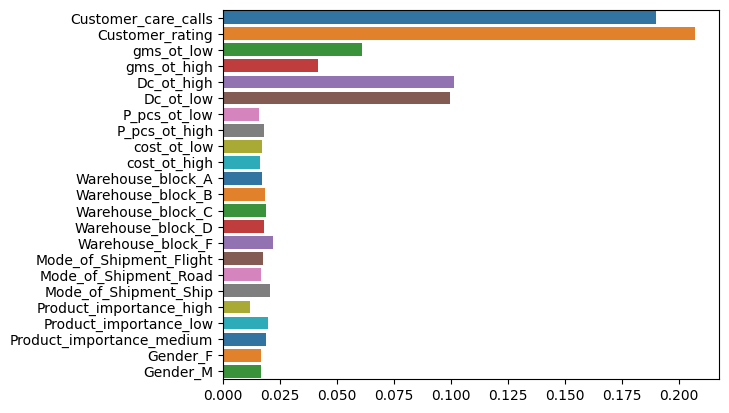

In [ ]:
sns.barplot(x=model.feature_importances_, y=model.feature_names_in_, palette="tab10")

#### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model1 = GradientBoostingClassifier(random_state=42)
model1

GradientBoostingClassifier(random_state=42)

In [ ]:
max_depth = np.random.randint(2, 20, 10)
n_estimators = np.random.randint(20, 150, 10)
learning_rate = np.random.uniform(0.4, 0.7, 100)

In [ ]:
param_distributions = {
                       "max_depth": max_depth,
                       "n_estimators": n_estimators,
                       "learning_rate": learning_rate,
                       "min_samples_split": list(range(2, 7))}
param_distributions

{'max_depth': array([10, 14,  9,  5, 12,  5, 14,  6,  8, 11]),
 'n_estimators': array([147,  98,  92,  70, 105,  93, 127,  46, 103, 116]),
 'learning_rate': array([0.49488119, 0.42446023, 0.43115443, 0.50906822, 0.51458875,
        0.44932645, 0.50148082, 0.68907834, 0.52569633, 0.41660502,
        0.48150643, 0.60110962, 0.5214586 , 0.43694563, 0.61102251,
        0.61799346, 0.50538893, 0.48979611, 0.44644263, 0.67797465,
        0.4038676 , 0.528623  , 0.50149519, 0.59849435, 0.58836356,
        0.40753559, 0.67962625, 0.56767406, 0.42342529, 0.68833681,
        0.43173655, 0.46760497, 0.58187099, 0.52323907, 0.55470218,
        0.61212032, 0.51632343, 0.48578336, 0.6231846 , 0.61222083,
        0.53755938, 0.60647624, 0.64410078, 0.68467001, 0.48371677,
        0.5838311 , 0.54634687, 0.43927754, 0.62050889, 0.68192398,
        0.65977852, 0.55830131, 0.64521146, 0.49077589, 0.65870361,
        0.62748425, 0.61447276, 0.68635135, 0.67231933, 0.5804423 ,
        0.52817161, 0.600117

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

clf1 = RandomizedSearchCV(model1,
                   param_distributions,
                   n_iter=100,
                   scoring="accuracy",
                   n_jobs=-1,
                   cv=5,
                   random_state=42
                   )
clf1.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.49488119, 0.42446023, 0.43115443, 0.50906822, 0.51458875,
       0.44932645, 0.50148082, 0.68907834, 0.52569633, 0.41660502,
       0.48150643, 0.60110962, 0.5214586 , 0.43694563, 0.61102251,
       0.61799346, 0.50538893, 0.48979611, 0.44644263...
       0.54742242, 0.55803809, 0.52471342, 0.67307017, 0.44640503,
       0.68190221, 0.55450756, 0.49015711, 0.52254831, 0.41354321,
       0.52113691, 0.52211356, 0.64738128, 0.58675728, 0.65621025,
       0.62428514, 0.47058397, 0.69397314, 0.5250144 , 0.56655247]),
                                        'max_depth': array([10, 14,  9,  5, 12,  5, 14,  6,  8, 11]),
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': array([147,  98,  92,  70, 105,  93, 127,  46, 103, 116])},
                   random_state=42, scoring='accuracy')

In [ ]:
clf1.best_params_

{'n_estimators': 46,
 'min_samples_split': 3,
 'max_depth': 5,
 'learning_rate': 0.4311544314661694}

In [ ]:
clf1.score(X_test, y_test)

0.6595454545454545

In [ ]:
model1.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_predict1 = model1.predict(X_test)
y_predict1

array([1, 0, 0, ..., 0, 0, 1])

<Axes: >

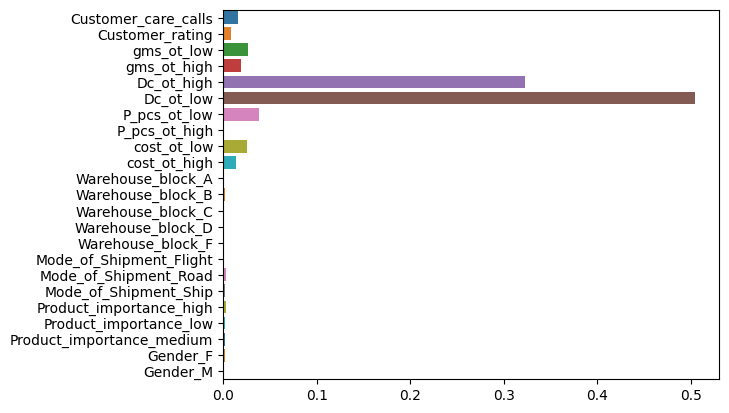

In [ ]:
sns.barplot(x=model1.feature_importances_, y=model.feature_names_in_, palette="tab10")

#### 결정 트리

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model2 = DecisionTreeClassifier(random_state=42)
model2

DecisionTreeClassifier(random_state=42)

In [ ]:
max_depth = np.random.randint(2, 20, 10)
max_features = np.random.uniform(0.4, 0.7, 100)

In [ ]:
param_distributions = {"max_depth": max_depth,
                       "max_features": max_features,
                       "min_samples_split": list(range(2, 7))}
param_distributions

{'max_depth': array([13, 18, 18,  3, 17, 10, 17,  8, 17, 14]),
 'max_features': array([0.4422909 , 0.63577045, 0.6628869 , 0.60753711, 0.61356356,
        0.42448765, 0.44217093, 0.56859247, 0.69341303, 0.65667548,
        0.50566015, 0.58054552, 0.43406857, 0.47865357, 0.61125618,
        0.48440041, 0.4893498 , 0.43470238, 0.69200702, 0.60011021,
        0.46125839, 0.54819679, 0.58862676, 0.52938524, 0.56327944,
        0.54220287, 0.6852003 , 0.53631818, 0.50173829, 0.49826241,
        0.69437202, 0.44751599, 0.62733259, 0.68868696, 0.63709634,
        0.69873427, 0.54094622, 0.5807476 , 0.41747987, 0.64002168,
        0.54499624, 0.68886728, 0.42356715, 0.66304906, 0.45433623,
        0.61113496, 0.5578684 , 0.62832181, 0.50414828, 0.44675891,
        0.68722043, 0.55223445, 0.65042836, 0.63670528, 0.66670933,
        0.65192747, 0.51506231, 0.431812  , 0.55930094, 0.42164226,
        0.44985124, 0.43650884, 0.48940815, 0.54928139, 0.45246616,
        0.62844307, 0.44980834, 0.441

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

clf2 = RandomizedSearchCV(model2,
                   param_distributions,
                   n_iter=100,
                   scoring="accuracy",
                   n_jobs=-1,
                   cv=5,
                   random_state=42
                   )
clf2.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': array([13, 18, 18,  3, 17, 10, 17,  8, 17, 14]),
                                        'max_features': array([0.4422909 , 0.63577045, 0.6628869 , 0.60753711, 0.61356356,
       0.42448765, 0.44217093, 0.56859247, 0.69341303, 0.65667548,
       0.50566015, 0.58054552, 0.43406857, 0.47865357, 0.61125618,...
       0.49788959, 0.42331553, 0.5213146 , 0.46257162, 0.60961527,
       0.57914805, 0.59435776, 0.68638885, 0.59948445, 0.41370296,
       0.60236445, 0.68354935, 0.67798994, 0.54705752, 0.67194388,
       0.58659939, 0.49568098, 0.54973386, 0.62691555, 0.48616524,
       0.66077333, 0.55120362, 0.636083  , 0.40265605, 0.63204049,
       0.65027526, 0.67700612, 0.65725452, 0.58909291, 0.50722706]),
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   random_state=42, scoring='accuracy')

In [ ]:
clf2.best_params_

{'min_samples_split': 4, 'max_features': 0.6360830040631682, 'max_depth': 3}

In [ ]:
clf2.score(X_test, y_test)

0.6804545454545454

In [ ]:
model2 = DecisionTreeClassifier(max_depth=4, max_features=0.5092349611671583, min_samples_split=6,
    random_state=42) # RandomSearchCV 값에 따라 parameter 값 변경

In [ ]:
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features=0.5092349611671583,
                       min_samples_split=6, random_state=42)

In [ ]:
y_predict2 = model2.predict(X_test)
y_predict2

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.tree import plot_tree

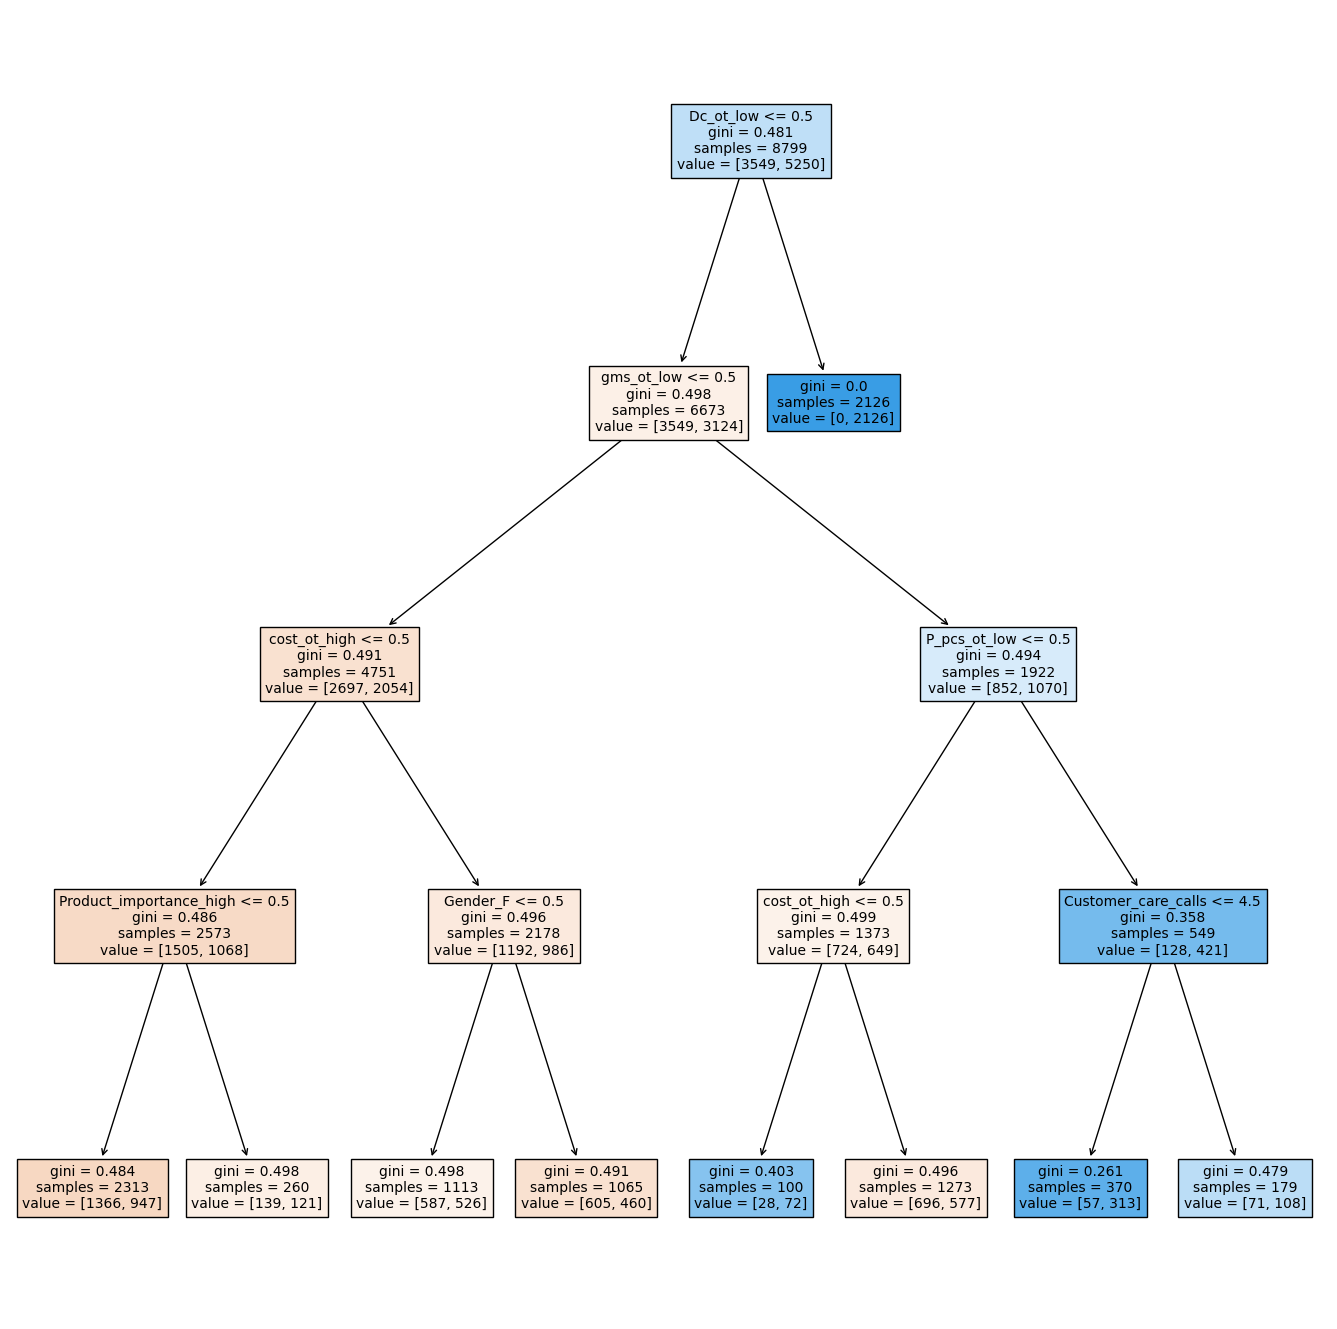

In [ ]:
feature_names = X.columns.tolist()

plt.figure(figsize=(17, 17))
tree = plot_tree(model2,
                 feature_names=feature_names,
                 filled=True,
                 fontsize=10)

#### Cat Boost

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.4 MB/s eta 0:00:00


In [ ]:
!pip install optuna

In [ ]:
# Optuna Libraries
import optuna
from optuna import Trial
from optuna.samplers import TPESampler

# Catboost
from catboost import CatBoostClassifier

# LGBM Regressor
from lightgbm import LGBMRegressor

In [ ]:
# random sampler
sampler = TPESampler(seed=42)

# define function
def objective(trial):

    cbrm_param = {
        'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
        'depth': trial.suggest_int('depth',1, 15),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf',1,30),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1,15),
        'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.01, 100.00),
    }

    # Generate model
    model_cbrm = CatBoostClassifier(**cbrm_param)
    model_cbrm = model_cbrm.fit(X_train, y_train, eval_set=[(X_test, y_test)],
                           verbose=0, early_stopping_rounds=25)

    accuracy = accuracy_score(y_test, model_cbrm.predict(X_test))
    return accuracy

optuna_cbrm = optuna.create_study(direction='maximize', sampler=sampler)
optuna_cbrm.optimize(objective, n_trials=50)

[I 2024-02-06 10:29:40,649] A new study created in memory with name: no-name-0d1d3308-4a73-4906-95bd-118914ed75f7
[I 2024-02-06 10:29:57,674] Trial 0 finished with value: 0.6790909090909091 and parameters: {'learning_rate': 0.3807947176588889, 'depth': 15, 'min_data_in_leaf': 22, 'leaf_estimation_iterations': 9, 'bagging_temperature': 0.04207988669606638}. Best is trial 0 with value: 0.6790909090909091.
[I 2024-02-06 10:29:58,792] Trial 1 finished with value: 0.6713636363636364 and parameters: {'learning_rate': 0.16443457513284063, 'depth': 1, 'min_data_in_leaf': 26, 'leaf_estimation_iterations': 10, 'bagging_temperature': 6.79657809075816}. Best is trial 0 with value: 0.6790909090909091.
[I 2024-02-06 10:31:28,705] Trial 2 finished with value: 0.6563636363636364 and parameters: {'learning_rate': 0.03037864935284442, 'depth': 15, 'min_data_in_leaf': 25, 'leaf_estimation_iterations': 4, 'bagging_temperature': 0.053370327626039576}. Best is trial 0 with value: 0.6790909090909091.
[I 2024

In [ ]:
cbrm_trial = optuna_cbrm.best_trial
cbrm_trial_params = cbrm_trial.params
print('Best Trial: score {},\nparams {}'.format(cbrm_trial.value, cbrm_trial_params))

Best Trial: score 0.6877272727272727,
params {'learning_rate': 0.5879707856144905, 'depth': 4, 'min_data_in_leaf': 17, 'leaf_estimation_iterations': 4, 'bagging_temperature': 10.455672396085207}


In [ ]:
cbrm = CatBoostClassifier(**cbrm_trial_params, random_state=42)
cbrm_study = cbrm.fit(X_train, y_train)

0:	learn: 0.5251810	total: 2.04ms	remaining: 2.04s
1:	learn: 0.5090817	total: 3.97ms	remaining: 1.98s
2:	learn: 0.5067006	total: 6.05ms	remaining: 2.01s
3:	learn: 0.5053827	total: 7.99ms	remaining: 1.99s
4:	learn: 0.5042932	total: 9.96ms	remaining: 1.98s
5:	learn: 0.5031453	total: 12.2ms	remaining: 2.03s
6:	learn: 0.5025635	total: 14.5ms	remaining: 2.06s
7:	learn: 0.5018318	total: 16.7ms	remaining: 2.07s
8:	learn: 0.5012220	total: 19ms	remaining: 2.09s
9:	learn: 0.5007136	total: 21.1ms	remaining: 2.09s
10:	learn: 0.5002574	total: 23.4ms	remaining: 2.11s
11:	learn: 0.4992987	total: 25.4ms	remaining: 2.09s
12:	learn: 0.4985982	total: 27.5ms	remaining: 2.09s
13:	learn: 0.4978813	total: 29.7ms	remaining: 2.09s
14:	learn: 0.4974728	total: 31.6ms	remaining: 2.08s
15:	learn: 0.4971070	total: 33.4ms	remaining: 2.06s
16:	learn: 0.4966804	total: 35.9ms	remaining: 2.08s
17:	learn: 0.4958597	total: 37.8ms	remaining: 2.06s
18:	learn: 0.4952666	total: 40.1ms	remaining: 2.07s
19:	learn: 0.4945296	tot

In [ ]:
cbrm_study.score(X_test, y_test)

0.6622727272727272

In [ ]:
cb = CatBoostClassifier(learning_rate=0.00125, verbose=False, random_state=42) # 무작위로 아무 값이나 넣음
cb.fit(X_train, y_train)

y_pred = cb.predict(X_test)

accuracy_score(y_test, y_pred)

0.6768181818181818

로지스틱 회귀분석

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model3 = LogisticRegression(random_state=42)
model3

LogisticRegression(random_state=42)

In [ ]:
param_distributions = {'C':[0.01, 0.1, 1, 5, 10],
                       'max_iter': [100, 300, 500, 700, 900]}
param_distributions

{'C': [0.01, 0.1, 1, 5, 10], 'max_iter': [100, 300, 500, 700, 900]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

clf3 = RandomizedSearchCV(model3,
                   param_distributions,
                   n_iter=100,
                   scoring="accuracy",
                   n_jobs=-1,
                   cv=5,
                   random_state=42
                   )
clf3.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 5, 10],
                                        'max_iter': [100, 300, 500, 700, 900]},
                   random_state=42, scoring='accuracy')

In [ ]:
clf3.best_params_

{'max_iter': 100, 'C': 10}

In [ ]:
clf3.score(X_test, y_test)

0.6686363636363636

In [ ]:
model3 = DecisionTreeClassifier(max_depth=4, max_features=0.5092349611671583, min_samples_split=6,
    random_state=42) # RandomSearchCV 값에 따라 parameter 값 변경

In [ ]:
model3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features=0.5092349611671583,
                       min_samples_split=6, random_state=42)

In [ ]:
y_predict3 = model3.predict(X_test)
y_predict3

array([1, 0, 0, ..., 0, 0, 1])

모델 비교

In [ ]:
Models = {
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "                   Logistic Regression": LogisticRegression(),
    "                                   KNN": KNeighborsClassifier(),
    "                              CatBoost": CatBoostClassifier(verbose=False)
}

for name, model in Models.items():
    model.fit(X_train, y_train)

    print(name + ": {:1.2f}%".format(model.score(X_test, y_test) * 100))

                         Random Forest: 64.86%
                     Gradient Boosting: 67.95%
                         Decision Tree: 65.41%
                   Logistic Regression: 67.09%
                                   KNN: 64.23%
                              CatBoost: 66.32%
